# Model interpretation

This page discusses ways to interpret machine learning models to understand why they make different decisions.

In [2]:
import numpy as np
import sklearn.linear_model
import matplotlib.pyplot as plt

## Permutation importance

To estimate features importances of the arbitrary model you can use permutation importance algorithm. The idea is to randomly change some features of the input, and estimate a change of the model's quality measure - big change means that feature was important. For more details check ["Permutation feature importance"](https://scikit-learn.org/stable/modules/permutation_importance.html#permutation-feature-importance), page on sklearn.

---

The code in the following cell creates a small $X \rightarrow y$ relationship dataset, so that each next column has a greater impact on the result than the previous one.

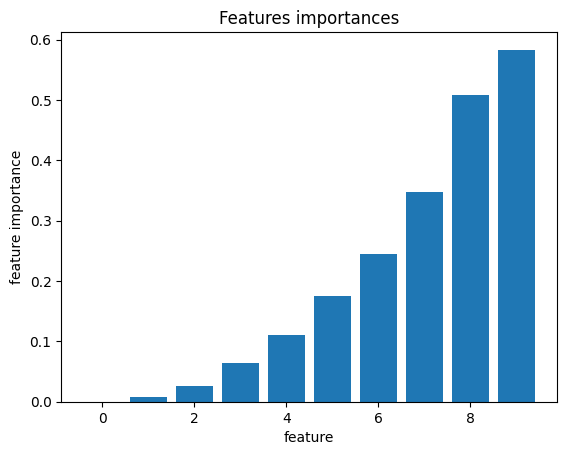

In [3]:
features_numer = 10
sample_size = 500

X = np.random.uniform(-5, 5, (sample_size, features_numer))
y = (X @ np.arange(features_numer))

model = sklearn.linear_model.LinearRegression().fit(X=X, y=y)

from sklearn.inspection import permutation_importance
importances = permutation_importance(
    estimator=model, X=X, y=y, scoring="r2"
)["importances_mean"]

plt.bar(range(importances.shape[0]), importances)
plt.xlabel("feature"), plt.ylabel("feature importance")
plt.title("Features importances")
plt.show()

As a result, other features have a greater impact on the outcome.